# TOP 950 IMDB RATED MOVIES

## Table of contents

1. [Table formation](#Table-Formation)
2. [Data cleaning](#Data-Cleaing)
3. [Data Analysis](#Data-Analysis)
   1. [Heat Maps](#heat-maps)
      1. [Conclusions](#conclusions)
   2. [Pair Plot](#pair-plot)
      1. [Observations](#observartions)
   3. [Top Directors](#top-directors)
      1. [Conclusion](#conclusion)
   4. [Top Stars and Writers](#top-stars-and-writers)
      1. [Top Stars](#top-stars)
      2. [Top Writers](#top-writers)
   5. [IMDb ratings v/s Meta scores](#imdb-rating-vs-meta-scores)
   6. [Conclusion](#conclusion1)
4. [Regression Model](#regression-model)
   1. [Pre-processing](#pre-processing)
   2. [Model Fine-Tuning](#model-fine-tuning)
   3. [Feature Engineering](#feature-engineering)
   4. [Model Metrics](#model-metrics)

## Table Formation

This is a dataset obtained from **Kaggle**. It ranks all the Top 950 movies. We will be analysing this dataset to reach various conclusions.

We will use **pandas** for manipulating the data and **seaborn** for graphical representations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset is in form of a CSV file. We makes a dataframe out of it.

In [2]:
df = pd.read_csv("data/imdb-top-rated-movies-user-rated.csv")
df.head()

,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross
0,1,Once Upon a Time... in Hollywood,7.6,927K,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"""Period Drama, Showbiz Drama, Comedy, Drama""",Quentin Tarantino,"""As Hollywood's Golden Age is winding down dur...",Quentin Tarantino,"""Leonardo DiCaprio, Brad Pitt, Margot Robbie""","""Reviewers say 'Once Upon a Time in Hollywood'...",-
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311K,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"""Action Epic, Adventure Epic, Spy, Action, Adv...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,"""Bruce Geller, Christopher McQuarrie, Erik Jen...","""Tom Cruise, Hayley Atwell, Ving Rhames""","""Reviewers say 'Mission: Impossible - Dead Rec...",-
2,3,John Wick: Chapter 4,7.6,392K,https://www.imdb.com/title/tt10366206/mediavie...,https://imdb-video.media-imdb.com/vi289916185/...,78.0,"""Action Epic, Gun Fu, One,Person Army Action, ...",Chad Stahelski,"""John Wick uncovers a path to defeating The Hi...","""Shay Hatten, Michael Finch, Derek Kolstad""","""Keanu Reeves, Laurence Fishburne, George Geor...","""Reviewers say 'John Wick: Chapter 4' is laude...",-
3,4,Watchmen,7.6,603K,https://www.imdb.com/title/tt0409459/mediaview...,https://imdb-video.media-imdb.com/vi240565017/...,56.0,"""Dystopian Sci,Fi, Superhero, Action, Drama, M...",Zack Snyder,"""In a version of 1985 where superheroes exist-...","""Dave Gibbons, David Hayter, Alex Tse""","""Jackie Earle Haley, Patrick Wilson, Carla Gug...","""Reviewers say 'Watchmen' is acclaimed for its...",-
4,5,The Fifth Element,7.6,533K,https://www.imdb.com/title/tt0119116/mediaview...,https://imdb-video.media-imdb.com/vi854720793/...,52.0,"""Sci,Fi Epic, Space Sci,Fi, Action, Adventure,...",Luc Besson,"""In the colorful future- a cab driver unwittin...","""Luc Besson, Robert Mark Kamen""","""Bruce Willis, Milla Jovovich, Gary Oldman""",-,-


The data gives information about the rank, IMDb rating, Meta score, genres, directors, Actors, etc. The values in **Votes** is in string form that is written in terms of K and M. So we also need to assign appropriate numerical values to the entires.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             950 non-null    int64  
 1   Title            950 non-null    object 
 2   IMDb Rating      950 non-null    float64
 3   Votes            950 non-null    object 
 4   Poster URL       950 non-null    object 
 5   Video URL        918 non-null    object 
 6   Meta Score       793 non-null    float64
 7   Tags             950 non-null    object 
 8   Director         950 non-null    object 
 9   Description      950 non-null    object 
 10  Writers          950 non-null    object 
 11  Stars            949 non-null    object 
 12  Summary          298 non-null    object 
 13  Worldwide Gross  53 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory usage: 104.0+ KB


The info of the table tells about the data type of the different columns and the number of Non-Null entries. 

It is clear that Meta Score, Summary and Worldwide Gross have significant Null entries.

In [4]:
df.describe()

,Rank,IMDb Rating,Meta Score
count,950.000000,950.000000,793.000000
mean,475.500000,7.944632,79.142497
std,274.385677,0.217292,11.864497
min,1.000000,7.600000,30.000000
25%,238.250000,7.800000,72.000000
50%,475.500000,7.900000,80.000000
75%,712.750000,8.100000,88.000000
max,950.000000,8.500000,100.000000


- IMDb ratings range from 7.6 to 8.5 in this list. And the average rating is around 7.9. This stat tells us that to make it into this list, you need at least 7.6 IMDb rating.
- The votes range from 26k to 1.9M. The mean number of votes is around 300k votes.
- The Meta Scores vary from 11 to 88. But the mean 79. This tells that Meta Score tends to strongly judge the movies when compared IMDb rating.

## Data Cleaning <a name="data_cleaning"></a>

We start with correcting the entires of the **Votes** column.

In [5]:
def map_votes(votes):
    if votes[-1] == 'K':
        return int(float(votes[:-1])*1000)
    elif votes[-1] == 'M':
        return int(float(votes[:-1])*1000000)
    else:
        return int(votes)
df["Votes"] = df["Votes"].map(map_votes)

df.sample()

,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross
109,110,Lucky Number Slevin,7.7,335000,https://www.imdb.com/title/tt0425210/mediaview...,https://imdb-video.media-imdb.com/vi2073493785...,53.0,"Caper, Gangster, Crime, Drama, Thriller",Paul McGuigan,A case of mistaken identity lands Slevin into ...,Jason Smilovic,"Josh Hartnett, Ben Kingsley, Morgan Freeman",NaN,NaN


To convert the Votes into numerical values:-
- multiply **1000** if the suffix is K
- multiply **1000000** if the suffix is M

We now convert the string of names separated by commas in **Tags**, **Writers**, **Stars** into list of names. This is achieved using the split method.

In [6]:
df["Stars"] = df["Stars"].astype(str).map(lambda x:x.split(", "))
df["Writers"] = df["Writers"].astype(str).map(lambda x:x.split(", "))
df["Tags"] = df["Tags"].astype(str).map(lambda x:x.split(", "))

df.sample()

,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross
386,387,Arrival,7.9,833000,https://www.imdb.com/title/tt2543164/mediaview...,https://imdb-video.media-imdb.com/vi4225807897...,81.0,"[Alien Invasion, Epic, Psychological Drama, Sc...",Denis Villeneuve,Linguist Louise Banks leads a team of investig...,"[Eric Heisserer, Ted Chiang]","[Amy Adams, Jeremy Renner, Forest Whitaker]",NaN,NaN


In [7]:
df[~df["Worldwide Gross"].isna()]["Worldwide Gross"].head(10)

0    -
1    -
2    -
3    -
4    -
5    -
6    -
7    -
8    -
9    -
Name: Worldwide Gross, dtype: object

As you can see there are entries with **"-"** in Worldwide Gross apart from **NULL**. So we need to filter these entries too.

In [8]:
print(df[(~df["Worldwide Gross"].isna())&(df["Worldwide Gross"]!='-')]["Worldwide Gross"].count())
df[(~df["Worldwide Gross"].isna())&(df["Worldwide Gross"]!='-')]["Worldwide Gross"]

24


32         $45-050
82     $54-234-062
133     $7-153-487
313     $4-589-697
378     $3-710-169
443         $4-475
478       $241-914
575    $20-206-622
601        $15-942
621        $15-942
622        $11-537
635        $15-942
646    $15-291-338
701    $25-096-862
708       $312-104
733     $4-578-000
760         $2-715
762        $39-586
774        $36-121
797       $113-706
842        $46-382
915    $11-286-112
923       $975-543
927         $7-490
Name: Worldwide Gross, dtype: object

Now with all the **NULL** and **"-"** gone, we can see that there are genuine entries now. 

Every dash in these entries simply represent commas. For example $4-578-000 means $4,578,000. Practically we could remove all the dollar and - symbols, and then typcast.

In [9]:
def nums(str1):
    if pd.isna(str1):
        return np.nan
    str1 = str(str1)
    if str1 == "-":
        return np.nan
    ans = ""
    for i in str1:
        if(i.isnumeric()):
            ans+=i
    return str(ans)
df["Worldwide Gross"] = df["Worldwide Gross"].map(nums)
df[~df["Worldwide Gross"].isna()]["Worldwide Gross"].head(10)

32        45050
82     54234062
133     7153487
313     4589697
378     3710169
443        4475
478      241914
575    20206622
601       15942
621       15942
Name: Worldwide Gross, dtype: object

Now we have converted all those objects into integers and also handled the NaN and "-" cases. Finally we need to change the datatype of the column to float(as we can't have int with NaN).

In [10]:
df["Worldwide Gross"] = df["Worldwide Gross"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             950 non-null    int64  
 1   Title            950 non-null    object 
 2   IMDb Rating      950 non-null    float64
 3   Votes            950 non-null    int64  
 4   Poster URL       950 non-null    object 
 5   Video URL        918 non-null    object 
 6   Meta Score       793 non-null    float64
 7   Tags             950 non-null    object 
 8   Director         950 non-null    object 
 9   Description      950 non-null    object 
 10  Writers          950 non-null    object 
 11  Stars            950 non-null    object 
 12  Summary          298 non-null    object 
 13  Worldwide Gross  24 non-null     float64
dtypes: float64(3), int64(2), object(9)
memory usage: 104.0+ KB


The data cleaning process is finally complete.

## Data Analysis

### Heat maps

Now that the data has been cleaned, the next step is to analyze the data and draw appropriate conclusions.

We start with general analysis, that is finding the pairs of variables that have some kind of relationship with each other. This is best achieved by correlation matrix. We first need to seperate all the numerical variables of the dataframe and then form their coorelation matrix.

In [11]:
df_num = df[["Rank","IMDb Rating", "Votes", "Meta Score","Worldwide Gross"]]
df_num.corr()

,Rank,IMDb Rating,Votes,Meta Score,Worldwide Gross
Rank,1.000000,0.973619,0.183112,0.242839,-0.359940
IMDb Rating,0.973619,1.000000,0.316761,0.202009,-0.261140
Votes,0.183112,0.316761,1.000000,-0.140359,0.362928
Meta Score,0.242839,0.202009,-0.140359,1.000000,-0.265892
Worldwide Gross,-0.359940,-0.261140,0.362928,-0.265892,1.000000


Now we can go ahead and create a heatmap of this matrix.

<Axes: >

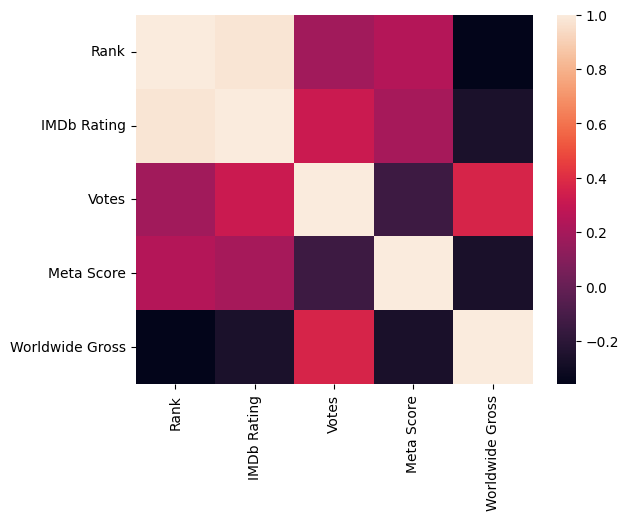

In [12]:
sns.heatmap(df_num.corr())

Now in this heatmap, we can see that the corrrelations with Worldwide Gross and Meta score are unreasonably negative. The NaN values in these columns could be affecting the correlations. So, to ensure we are not making any wrong judgement we can further clean the data by replacing the NaN values with the median for each of the columns.

<Axes: >

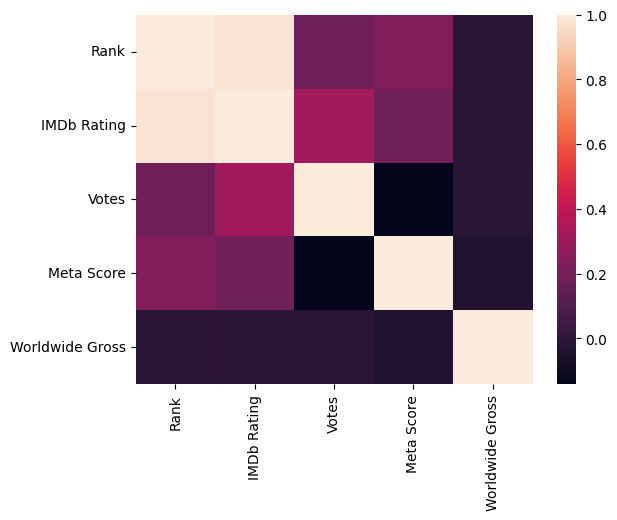

In [13]:
Votes_m = df_num["Votes"].median()
Meta_m = df_num["Meta Score"].median()
Gross_m = df_num["Worldwide Gross"].median()
# This is the recommended, unambiguous way
df_num.loc[:, "Votes"] = df_num["Votes"].fillna(Votes_m)
df_num.loc[:, "Meta Score"] = df_num["Meta Score"].fillna(Meta_m)
df_num.loc[:, "Worldwide Gross"] = df_num["Worldwide Gross"].fillna(Gross_m)
sns.heatmap(df_num.corr())

As evident, the Meta Score is still negative, which could mean that **Meta Score** and **Votes** actually do have an inverse relation.

Furthermore, the correlations with **Worldwide Gross** have almost become zero. This is probably because most entries in this column were NaN. This made the column almost constant, thus giving a misleading correlation.

In [14]:
df_num.corr()

,Rank,IMDb Rating,Votes,Meta Score,Worldwide Gross
Rank,1.000000,0.973619,0.183112,0.228396,-0.014831
IMDb Rating,0.973619,1.000000,0.316761,0.191970,-0.009756
Votes,0.183112,0.316761,1.000000,-0.142291,-0.021623
Meta Score,0.228396,0.191970,-0.142291,1.000000,-0.043356
Worldwide Gross,-0.014831,-0.009756,-0.021623,-0.043356,1.000000


So, now we can try and study only the entries where all entries are not NaN.

<Axes: >

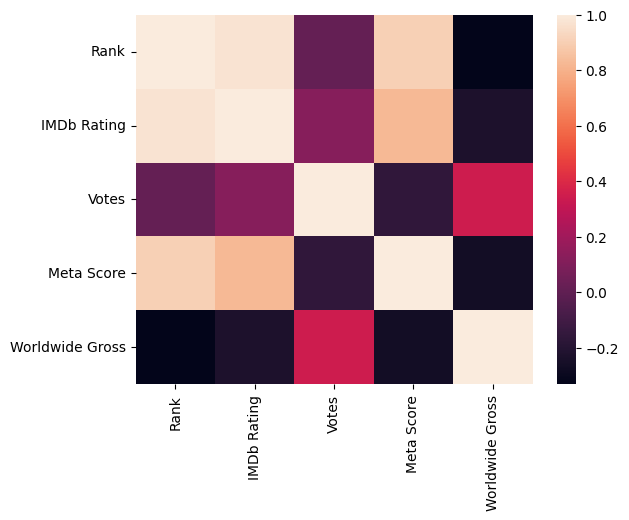

In [15]:
df_notnan = df[["Rank","IMDb Rating", "Votes", "Meta Score","Worldwide Gross"]]
df_notnan = df_notnan[(~df["Worldwide Gross"].isna())&(~df["Meta Score"].isna())]
sns.heatmap(df_notnan.corr())

In [16]:
df_notnan.corr()

,Rank,IMDb Rating,Votes,Meta Score,Worldwide Gross
Rank,1.000000,0.969519,0.014982,0.905598,-0.332558
IMDb Rating,0.969519,1.000000,0.115943,0.827774,-0.230647
Votes,0.014982,0.115943,1.000000,-0.163582,0.339208
Meta Score,0.905598,0.827774,-0.163582,1.000000,-0.265892
Worldwide Gross,-0.332558,-0.230647,0.339208,-0.265892,1.000000


#### Conclusions

Now we can see some clear conclusions.
- IMDb rating and Rank have a positive relation. Same for Meta Score and Rank. But this is contradictory. As the relation should have been negative. This is beacuse the better the movie, the lower the rank should be. So the ranking inverted. The higher the rank, the better the movie.
- IMDb rating and Meta scores have a decently positive relationship, in the original heatmap, the correlation was aroud 0.4.
- Meta scores and Votes also have negative correlation. This means they disagree. When a movie has high Meta score. It means a small set of people(critics) watched that movie and enjoyed it. But for votes to be high, the movie needs a large audience that this critically acclaimed movie fails to grab, thus a negative correlation.
- The Worldwide Gross has positive correlation with votes, which makes sense as the higher votes represent the larger number of people that paid to watch it. While it negatively correlates with rank as it is inverted.

This makes now gives us a clear indication of how IMDb must have ranked the movies. 
- First they shortlisted the movies that had a bare minimum number of votes. This is inidicated by the bare minimum correlation b/w them.
- Next the movies were ranked with lower priority given to Meta Score and higher priority given to IMDb scores.

### Pair Plot

Now we will try and create pairplots of the same numerical columns that we had serparated from our inital dataframe.

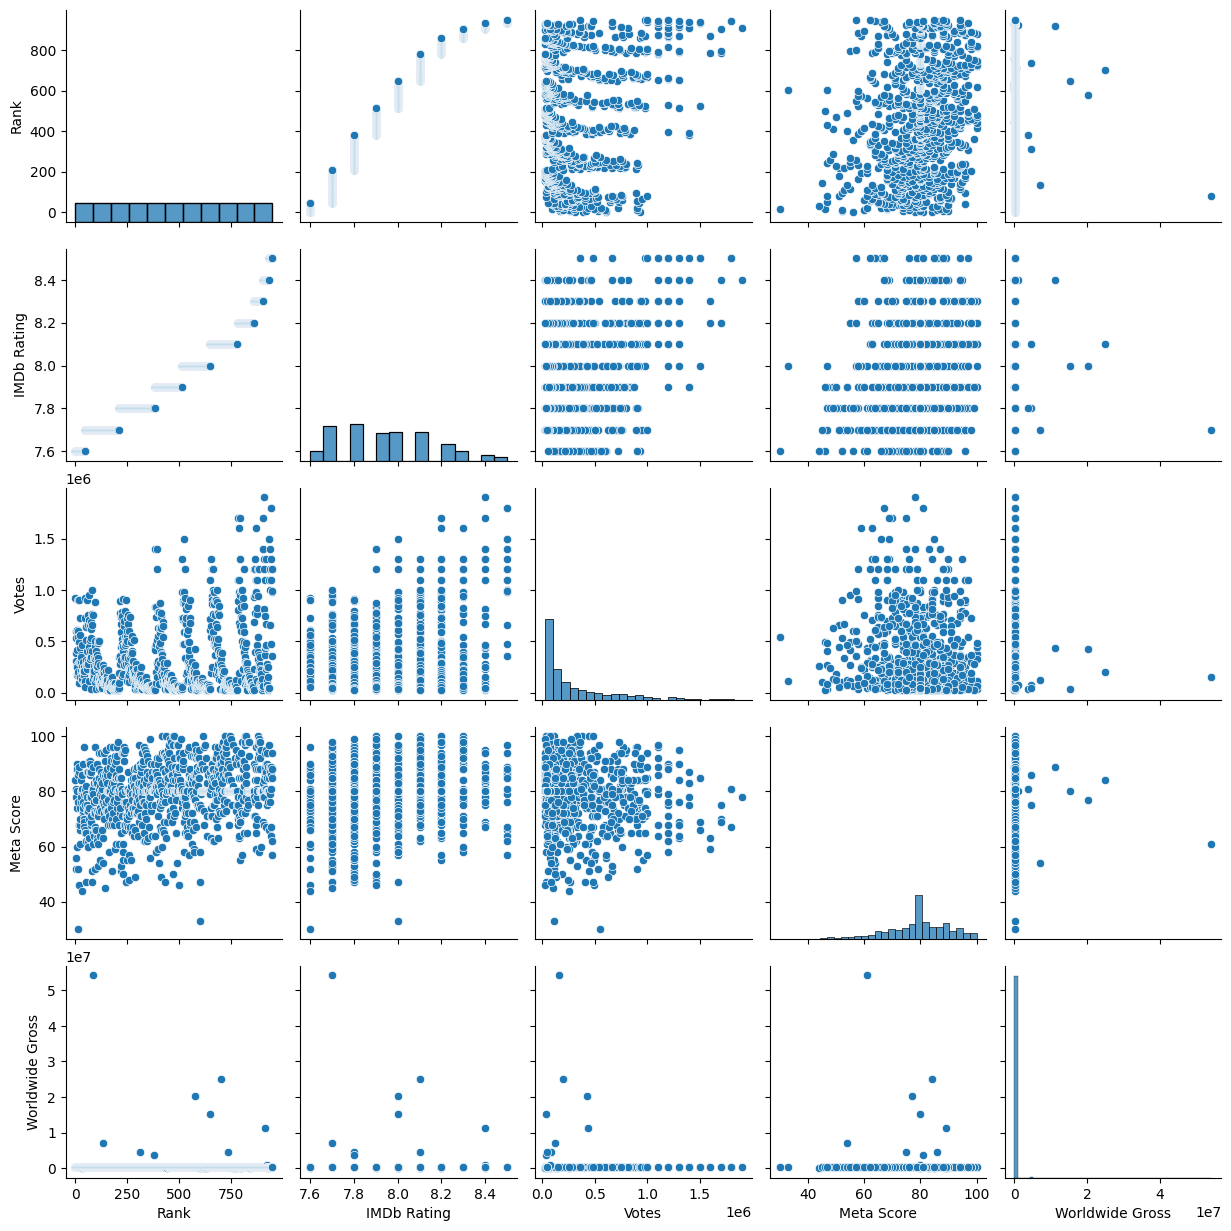

In [17]:
sns.pairplot(df_num)

#### Observartions

We observe the following:-
1. IMDb ranking is directly related to Rank. But beyond a certain point(beyond let's say 8.2 rating) it doesn't matter what the rating is. The ranking will not depend on it. So it is a game changer for low rated movies but doesn't affect high rated ones.
2. The greater the votes are, the likelier it is that the Rank and IMDb rating will be high.
3. Meta Scores beyond 40 are hardly seen in this dataset, likely indicating this as a threshold.
4. If meta scores are low, it very likely that both IMDb rating and ranking of the movie will also be low, indicating that Metascore is indeed a threshold.

### Top Directors

Now we divert our attention to exploring the top directors in this list. We do so by counting the number of movies made by each director.

In [18]:
top_directors = df.groupby('Director').size().sort_values(ascending=False)
top_directors = top_directors.reset_index()
top_directors.columns = ['Director', 'Number of Movies']
top_directors.head(15)

,Director,Number of Movies
0,Akira Kurosawa,11
1,Alfred Hitchcock,10
2,Martin Scorsese,9
3,Stanley Kubrick,9
4,Hayao Miyazaki,9
5,Ingmar Bergman,9
6,Steven Spielberg,9
7,Billy Wilder,8
8,Clint Eastwood,8
9,Howard Hawks,7


So we have listed the Top directors in terms of the number of movies directed. A better representation can be done using bar plot.

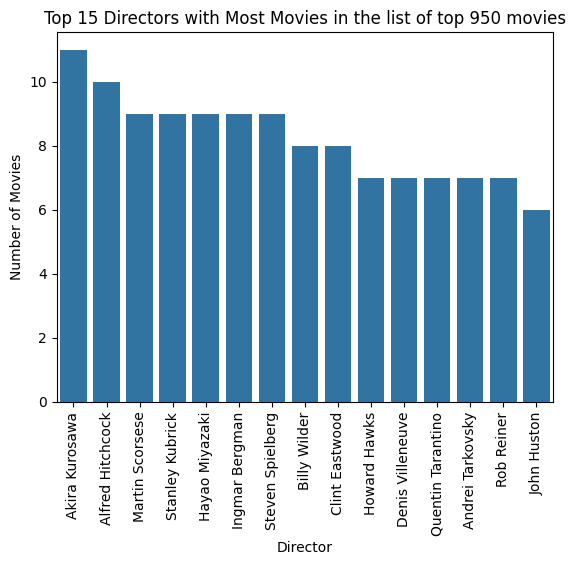

In [19]:
sns.barplot(x='Director',y='Number of Movies', data=top_directors.head(15))
plt.xticks(rotation=90)
plt.title("Top 15 Directors with Most Movies in the list of top 950 movies")
plt.show()

#### Conclusion
The top director in this list is Akira Kurosawa with 11 movies. While alfred Hitchock and Hayao Miyazaki have 10 and 9 movies under their belt respectively.

### Top Stars and Writers
We can do a similar analysis for top stars and writers in the list. But a movie may have multiple stars and writers in this list. So, to count the ocurrence of each of them, we must first separate them and then explode them into individual entries.

#### Top Stars
First we do it for the stars. We explode the entries, in form of lists, in Stars column, into individual entries.

In [20]:
df_stars = df.explode("Stars")
df_stars["Stars"] = df_stars["Stars"].str.strip('"')
df_stars.head()

,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross
0,1,Once Upon a Time... in Hollywood,7.6,927000,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"[""Period Drama, Showbiz Drama, Comedy, Drama""]",Quentin Tarantino,"""As Hollywood's Golden Age is winding down dur...",[Quentin Tarantino],Leonardo DiCaprio,"""Reviewers say 'Once Upon a Time in Hollywood'...",NaN
0,1,Once Upon a Time... in Hollywood,7.6,927000,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"[""Period Drama, Showbiz Drama, Comedy, Drama""]",Quentin Tarantino,"""As Hollywood's Golden Age is winding down dur...",[Quentin Tarantino],Brad Pitt,"""Reviewers say 'Once Upon a Time in Hollywood'...",NaN
0,1,Once Upon a Time... in Hollywood,7.6,927000,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"[""Period Drama, Showbiz Drama, Comedy, Drama""]",Quentin Tarantino,"""As Hollywood's Golden Age is winding down dur...",[Quentin Tarantino],Margot Robbie,"""Reviewers say 'Once Upon a Time in Hollywood'...",NaN
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311000,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"[""Action Epic, Adventure Epic, Spy, Action, Ad...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,"[""Bruce Geller, Christopher McQuarrie, Erik Je...",Tom Cruise,"""Reviewers say 'Mission: Impossible - Dead Rec...",NaN
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311000,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"[""Action Epic, Adventure Epic, Spy, Action, Ad...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,"[""Bruce Geller, Christopher McQuarrie, Erik Je...",Hayley Atwell,"""Reviewers say 'Mission: Impossible - Dead Rec...",NaN


Now we count the entries for each unique star. This is achieved by Groupby.

In [21]:
top_stars = df_stars.groupby("Stars")["Title"].count().sort_values(ascending=False)
top_stars = top_stars.reset_index()
top_stars.columns = ["Stars","Films"]
top_stars.head(20)

,Stars,Films
0,Robert De Niro,14
1,Aamir Khan,10
2,Tom Hanks,10
3,Leonardo DiCaprio,10
4,Matt Damon,10
5,Al Pacino,10
6,James Stewart,9
7,Tom Cruise,9
8,Christian Bale,9
9,Clint Eastwood,8


Now that we have obtained the data, we plot it in the form of a barplot.

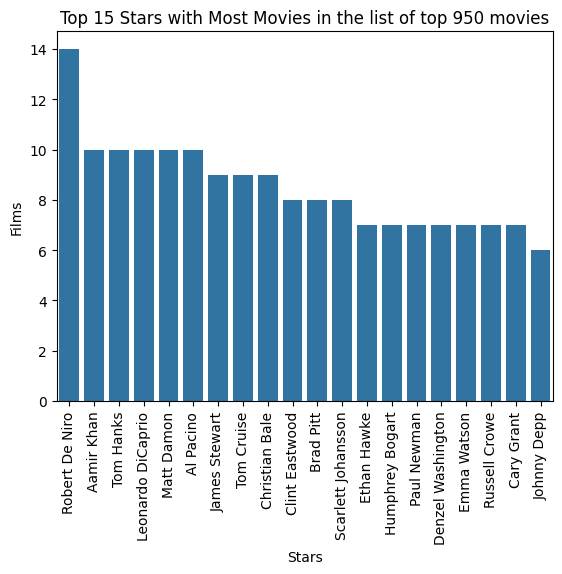

In [22]:
sns.barplot(data=top_stars.head(20),x="Stars",y="Films")
plt.xticks(rotation=90)
plt.title("Top 15 Stars with Most Movies in the list of top 950 movies")
plt.show()

As evident from the plot, Robert De Niro is the top Star with 14 movies in the list. While Aamir Khan, Matt Damon, Leonardo DiCaprio, Tom Hanks and Al Pacino, all have 10 movies in the list each. They are all one of the best actors.

### Top Writers

Now we explore the top writers in a similar fashion.

In [23]:
df_writers = df.explode("Writers")
df_writers["Writers"] = df_writers["Writers"].str.strip('"')
df_writers.head()

,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross
0,1,Once Upon a Time... in Hollywood,7.6,927000,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"[""Period Drama, Showbiz Drama, Comedy, Drama""]",Quentin Tarantino,"""As Hollywood's Golden Age is winding down dur...",Quentin Tarantino,"[""Leonardo DiCaprio, Brad Pitt, Margot Robbie""]","""Reviewers say 'Once Upon a Time in Hollywood'...",NaN
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311000,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"[""Action Epic, Adventure Epic, Spy, Action, Ad...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,Bruce Geller,"[""Tom Cruise, Hayley Atwell, Ving Rhames""]","""Reviewers say 'Mission: Impossible - Dead Rec...",NaN
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311000,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"[""Action Epic, Adventure Epic, Spy, Action, Ad...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,Christopher McQuarrie,"[""Tom Cruise, Hayley Atwell, Ving Rhames""]","""Reviewers say 'Mission: Impossible - Dead Rec...",NaN
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311000,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"[""Action Epic, Adventure Epic, Spy, Action, Ad...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,Erik Jendresen,"[""Tom Cruise, Hayley Atwell, Ving Rhames""]","""Reviewers say 'Mission: Impossible - Dead Rec...",NaN
2,3,John Wick: Chapter 4,7.6,392000,https://www.imdb.com/title/tt10366206/mediavie...,https://imdb-video.media-imdb.com/vi289916185/...,78.0,"[""Action Epic, Gun Fu, One,Person Army Action,...",Chad Stahelski,"""John Wick uncovers a path to defeating The Hi...",Shay Hatten,"[""Keanu Reeves, Laurence Fishburne, George Geo...","""Reviewers say 'John Wick: Chapter 4' is laude...",NaN


Now that we have exploded that writers column, we can group based on these Writers.

In [24]:
top_writers = df_writers.groupby("Writers")["Title"].count().sort_values(ascending=False)
top_writers = top_writers.reset_index()
top_writers.columns = ["Writers","Films"]
top_writers.head(20)

,Writers,Films
0,Hayao Miyazaki,10
1,Akira Kurosawa,9
2,Stanley Kubrick,8
3,Ingmar Bergman,8
4,Quentin Tarantino,8
5,Billy Wilder,8
6,Andrei Tarkovsky,7
7,Pete Docter,7
8,Ethan Coen,6
9,John Huston,6


Now we can plot this data on a bar plot to analyse it.

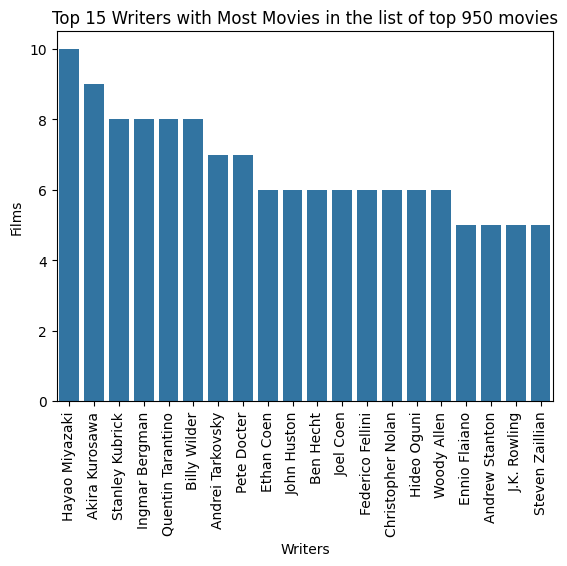

In [25]:
sns.barplot(data=top_writers.head(20),x="Writers",y="Films")
plt.xticks(rotation=90)
plt.title("Top 15 Writers with Most Movies in the list of top 950 movies")
plt.show()

As evident from the plot, Hayao Miyazaki abd Akira Kurosawa again top the list, with 10 and 9 movies written respectively.

### Genres

Now we will go ahead and study the genres (tags) of the movies in the list. We will first do the same things to explode the tags of the movies and then we will analyse the corresponding trends.

In [26]:
df_genre = df.explode("Tags")
df_genre["Tags"] = df_genre["Tags"].str.strip('"')
df_writers.head()

,Rank,Title,IMDb Rating,Votes,Poster URL,Video URL,Meta Score,Tags,Director,Description,Writers,Stars,Summary,Worldwide Gross
0,1,Once Upon a Time... in Hollywood,7.6,927000,https://www.imdb.com/title/tt7131622/mediaview...,https://imdb-video.media-imdb.com/vi1385741849...,84.0,"[""Period Drama, Showbiz Drama, Comedy, Drama""]",Quentin Tarantino,"""As Hollywood's Golden Age is winding down dur...",Quentin Tarantino,"[""Leonardo DiCaprio, Brad Pitt, Margot Robbie""]","""Reviewers say 'Once Upon a Time in Hollywood'...",NaN
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311000,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"[""Action Epic, Adventure Epic, Spy, Action, Ad...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,Bruce Geller,"[""Tom Cruise, Hayley Atwell, Ving Rhames""]","""Reviewers say 'Mission: Impossible - Dead Rec...",NaN
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311000,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"[""Action Epic, Adventure Epic, Spy, Action, Ad...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,Christopher McQuarrie,"[""Tom Cruise, Hayley Atwell, Ving Rhames""]","""Reviewers say 'Mission: Impossible - Dead Rec...",NaN
1,2,Mission: Impossible - Dead Reckoning Part One,7.6,311000,https://www.imdb.com/title/tt9603212/mediaview...,https://imdb-video.media-imdb.com/vi3500918553...,81.0,"[""Action Epic, Adventure Epic, Spy, Action, Ad...",Christopher McQuarrie,Ethan Hunt and his IMF team must track down a ...,Erik Jendresen,"[""Tom Cruise, Hayley Atwell, Ving Rhames""]","""Reviewers say 'Mission: Impossible - Dead Rec...",NaN
2,3,John Wick: Chapter 4,7.6,392000,https://www.imdb.com/title/tt10366206/mediavie...,https://imdb-video.media-imdb.com/vi289916185/...,78.0,"[""Action Epic, Gun Fu, One,Person Army Action,...",Chad Stahelski,"""John Wick uncovers a path to defeating The Hi...",Shay Hatten,"[""Keanu Reeves, Laurence Fishburne, George Geo...","""Reviewers say 'John Wick: Chapter 4' is laude...",NaN


Now we find the top Genres based on mean IMDb ratings.

In [27]:
top_genre = df_genre.groupby("Tags")["IMDb Rating"].mean()
top_genre = top_genre.reset_index()
top_genre.columns = ["Genre","Mean_IMDb_Rating"]
top_genre.sort_values("Mean_IMDb_Rating",ascending=False).head()

,Genre,Mean_IMDb_Rating
117,Shōjo,8.40
119,Sketch Comedy,8.20
37,Desert Adventure,8.12
73,Jukebox Musical,8.10
17,Bumbling Detective,8.10


We found that the top genres turned out to be very niche genres that would hardly have 2-3 movies in the list. So we decide to put a threhsold for the number movies in that genre. We choose that threshold as 20. We don't consider any movies with movies less than 20 movies.

In [28]:
counts = df_genre["Tags"].value_counts().sort_index()
counts = counts.reset_index()
counts.columns = ["Genre","Count"]
top_genre = pd.merge(left=top_genre,right=counts,how="outer")
top_genre[top_genre["Count"]>=20].sort_values("Mean_IMDb_Rating",ascending=False).head()

,Genre,Mean_IMDb_Rating,Count
89,"One,Person Army Action",8.055172,29
44,Epic,8.047573,103
154,War Epic,8.024138,29
153,War,8.024051,79
133,Supernatural Fantasy,8.024000,25


Finally we find that genres like one-person army action, epic, war, war epic are the most well-rated on average, that are actually relevant in the list.

### IMDb Rating v/s Meta Scores

Now we compare the IMDb rating with the Mets scores.

- IMDb scores are the scores given by the audience of the movie.
- Meta scores are the scores given the critics.

Since meta scores and IMDb ratings have different ranges, we need to bring them on the same scale first, and then we can compare them. Meta scores range upto a score of 100 while IMDb scores range upto 10. So we will multiply the IMDb ratings by 10 and then calculate the difference for each movie.

Since there are some cases where Meta scores are NaN, so we pick only the entires that are not NaN.

In [29]:
df_meta = df[(~(df["Meta Score"].isna()))&(~(df["IMDb Rating"].isna()))]
score_diff = df_meta["IMDb Rating"]*10 - df_meta["Meta Score"]
score_diff.mean().round(4)

np.float64(0.1059)

We find that the mean difference between Meta Scores and IMDb ratings is close to 0. Which means, on average these two quantities agree.

Now let's try studying the distribution of the difference in these scores. 

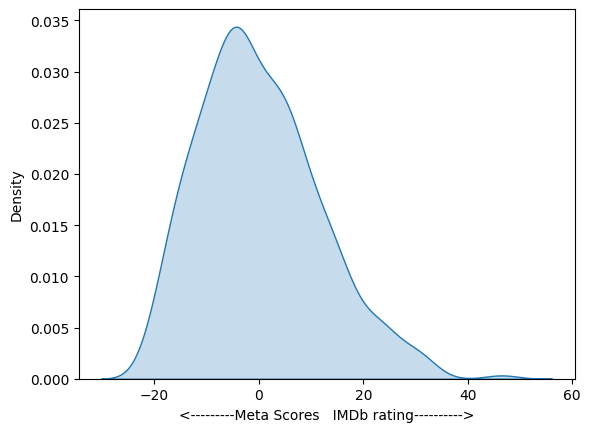

In [30]:
sns.kdeplot(score_diff,fill=True)
plt.xlabel("<---------Meta Scores   IMDb rating---------->")
plt.show()

This plot shows the distribution of the difference in the two scores.

There are two kinds of situations according to this graph
- IMDb rating could be greater than the Meta Scores. This means that general audience found the movie good but the critics said otherwise.
- IMDb rating could be less than the Meta Scores. This means that critics found the movie good but the general audience didn't.

Positive value on x-axis means IMDb ratings are greater and negative value means Meta scores are greater.

From the graph we can tell that the movies that are really popular but not well acclaimed tend to have a higher IMDb rating ( upto 40 of difference).
While the movies that are well acclaimed but not so popular (underrated) tend to not have not a very high Meta score(upto -30 of difference).

Text(0, 0.5, '<---------Meta Scores   IMDb Scores---------->')

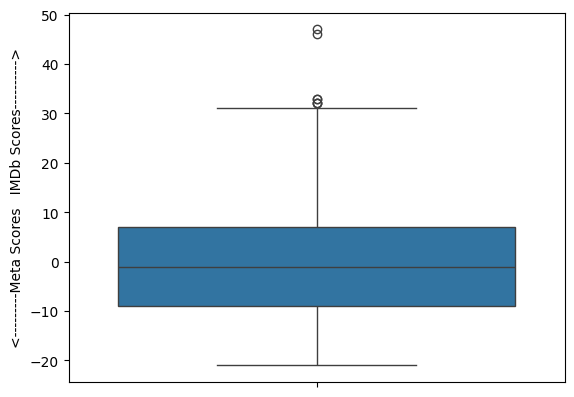

In [31]:
sns.boxplot(score_diff)
plt.ylabel("<---------Meta Scores   IMDb Scores---------->")

Now finally this box-wisker plot reflects that the median of the difference is around 0. But the upper extreme (popular but not well acclaimed) is greater. This means that the general audience tend to overrate the movies when they are fan favourite but not critic approved.

## Regression Model

Now we divert our attention to selecting an appropriate model and fine tuning it in order to predict the IMDb scores.

We start start with a simple model like *Linear Regression* and move on to a more advanced model like *XGBoost*. With the first we set a base line for our model and then we improve the performace with the next.

### Pre-Processing

Our first step is to split the data into training and testing dataset and imputing the missing values (meta scores) for the average values.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
df_cleaned = df.copy()


X = df_cleaned[['Votes','Meta Score','Stars' ,'Director','Tags','Writers','Title','IMDb Rating']]
y = df_cleaned['IMDb Rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=17)

imputer = SimpleImputer(strategy='mean')
X_train['Meta Score'] = imputer.fit_transform(X_train[['Meta Score']])
X_test['Meta Score'] = imputer.transform(X_test[['Meta Score']])
X_train

,Votes,Meta Score,Stars,Director,Tags,Writers,Title,IMDb Rating
598,72000,58.000000,"[Tim Roth, Pruitt Taylor Vince, Mélanie Thierry]",Giuseppe Tornatore,"[Coming,of,Age, Period Drama, Drama, Music, Ro...","[Alessandro Baricco, Giuseppe Tornatore]",The Legend of 1900,8.0
690,847000,73.000000,"[Clint Eastwood, Bee Vang, Christopher Carley]",Clint Eastwood,"[Dark Comedy, Psychological Drama, Drama]","[Nick Schenk, Dave Johannson]",Gran Torino,8.1
803,1000000,72.000000,"[Russell Crowe, Ed Harris, Jennifer Connelly]",Ron Howard,"[Docudrama, Period Drama, Psychological Drama,...","[Akiva Goldsman, Sylvia Nasar]",A Beautiful Mind,8.2
870,132000,88.000000,"[Lin,Manuel Miranda, Phillipa Soo, Leslie Odom...",Thomas Kail,"[Epic, Historical Epic, Biography, Drama, Hist...","[Lin,Manuel Miranda, Ron Chernow]",Hamilton,8.3
327,75000,82.000000,"[Emily Watson, Stellan Skarsgård, Katrin Cartl...",Lars von Trier,"[Period Drama, Psychological Drama, Tragedy, D...","[Lars von Trier, Peter Asmussen, David Pirie]",Breaking the Waves,7.8
...,...,...,...,...,...,...,...,...
406,869000,74.000000,"[Chris Hemsworth, Tom Hiddleston, Cate Blanchett]",Taika Waititi,"[Superhero, Action, Adventure, Comedy, Fantasy...","[Eric Pearson, Craig Kyle, Christopher L. Yost]",Thor: Ragnarok,7.9
390,741000,82.000000,"[Daniel Radcliffe, Emma Watson, Rupert Grint]",Alfonso Cuarón,"[Dark Fantasy, Supernatural Fantasy, Sword & S...","[J.K. Rowling, Steve Kloves]",Harry Potter and the Prisoner of Azkaban,7.9
143,133000,86.000000,"[Thomas Turgoose, Stephen Graham, Jo Hartley]",Shane Meadows,"[Coming,of,Age, Tragedy, Crime, Drama]",[Shane Meadows],This Is England,7.7
241,545000,80.000000,"[Steve Carell, Toni Collette, Greg Kinnear]",Jonathan Dayton,"[Coming,of,Age, Dark Comedy, Road Trip, Comedy...",[Michael Arndt],Little Miss Sunshine,7.8


Now we observe that there are various unique *Tags, Directors, Writers, and Stars,* and performing *one-hot encoding*(where we make a seperate feature for each category) for each of them is not feasible. So we turn to *target encoding* (where we replace each category with the average value of the target). Though this method poses significant chances of data leakage, especially when working with exploded data. So we use *Leave-One-Out Encoding* which assigns the average value of the target to the category while skipping the target value of that particular entry.

Finally we find the average values of the encoded features for each movie(so that number of columns in the encoded feature match the main dataset). Finally the encoded feature is merged back to the the dataset.

In [33]:
from category_encoders import LeaveOneOutEncoder
def process_exploded_feature(X_train_df, y_train_series, X_test_df, column_to_process, l):
    """
    Fits a LeaveOneOutEncoder on the training data and transforms both train and test sets.
    """
    train_index = X_train_df.index
    test_index = X_test_df.index

    # --- Process Training Data ---
    X_train_exploded = X_train_df.explode(column_to_process)
    y_train_exploded = X_train_exploded["IMDb Rating"]

    encoder = LeaveOneOutEncoder(cols=[column_to_process])
    # Fit the encoder ONLY on the training data
    encoder.fit(X_train_exploded[[column_to_process]], y_train_exploded)

    # Transform the training data
    X_train_exploded[f'foo_{column_to_process}'] = encoder.transform(X_train_exploded[[column_to_process]])
    train_agg = X_train_exploded.groupby('Title')[f'foo_{column_to_process}'].mean()
    X_train_df = pd.merge(X_train_df,train_agg, on='Title',how='left')

    # --- Process Test Data ---
    X_test_exploded = X_test_df.explode(column_to_process)
    # Transform the test data using the FITTED encoder
    X_test_exploded[f'foo_{column_to_process}'] = encoder.transform(X_test_exploded[[column_to_process]])
    test_agg = X_test_exploded.groupby('Title')[f'foo_{column_to_process}'].mean()
    X_test_df = pd.merge(X_test_df,test_agg, on='Title',how='left')

    # Drop the original list columns
    X_train_df = X_train_df.drop(columns=[column_to_process])
    X_test_df = X_test_df.drop(columns=[column_to_process])

    X_train_df.index = train_index
    X_test_df.index = test_index

    l.append(encoder)

    return X_train_df, X_test_df

Finally we apply the function that we created to the three features - Tags, Stars, Writers.

In [34]:
l = []
for col in ['Tags','Stars','Writers']:
    X_train,X_test = process_exploded_feature(X_train,y_train,X_test,col,l)

Now we directly apply Leave-one-out encoding to the Director feature.

In [35]:
encoder = LeaveOneOutEncoder(cols=['Director'])
encoder.fit(X_train[['Director']],y_train)
X_train['Director'] = encoder.transform(X_train['Director'])
X_test['Director'] = encoder.transform(X_test['Director'])
X_train.rename({'Director':'foo_Director'},inplace=True)
X_test.rename({'Director':'foo_Director'},inplace=True)

Now that the encoding part is done, we can drop the Title and IMDb Rating(target) features.

In [36]:
X_train.drop(columns=['Title','IMDb Rating'],inplace=True)
X_test.drop(columns=['Title', 'IMDb Rating'],inplace=True)

### Model Fine-Tuning

To start our fine-tuning, we set a baseline perfomance with a primitve model like Linear Regressor.

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_reg = reg.predict(X_test)
reg.score(X_test,y_test)

0.12361502120599144

As you can see we get an R-squared score of 12.3%. So this is the baseline performace.

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [100,200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_grid,
    n_iter=25,
    cv=5, # 5-fold cross-validation
    verbose=2,
    n_jobs=-1, # Use all available CPU cores
    random_state=42
)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'subsample': 0.7, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
xgb = XGBRegressor(
    objective='reg:squarederror', # Specifies the learning task
    n_estimators=300,            # Number of trees to build
    learning_rate=0.01,
    subsample = 0.7,    # How much each tree corrects the previous ones
    max_depth=5,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = r2_score(y_test,y_pred)
score

0.1460248434237671

### Feature engineering

Now we see a slight improvement in performace of the model. But we suspect that the foo_Stars feature may be causing overfitting as there are too many unique actors and it forces the model to memorize instead of learning. So we try without that feature.

In [40]:
X_train = X_train.drop(columns=['foo_Stars',])
X_test = X_test.drop(columns=['foo_Stars'])

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [100,200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_distributions=param_grid,
    n_iter=25,
    cv=5, # 5-fold cross-validation
    verbose=2,
    n_jobs=-1, # Use all available CPU cores
    random_state=42
)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'subsample': 0.7, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


In [42]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
xgb = XGBRegressor(
    objective='reg:squarederror', # Specifies the learning task
    n_estimators=300,            # Number of trees to build
    learning_rate=0.01,
    subsample = 0.7,    # How much each tree corrects the previous ones
    max_depth=5,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = r2_score(y_test,y_pred)
score

0.24865746260478083

As is it clear, a simple removal of the *foo_stars* columm boosted the R-squared score from 14% to almost 25%. This kind of jump is no coincidence. The Stars feature was indeed causing overfitting which results in poor performance of the model.

### Model Metrics

Now we will plot different graphs for the models and calculate the different metrics that help judge a model.

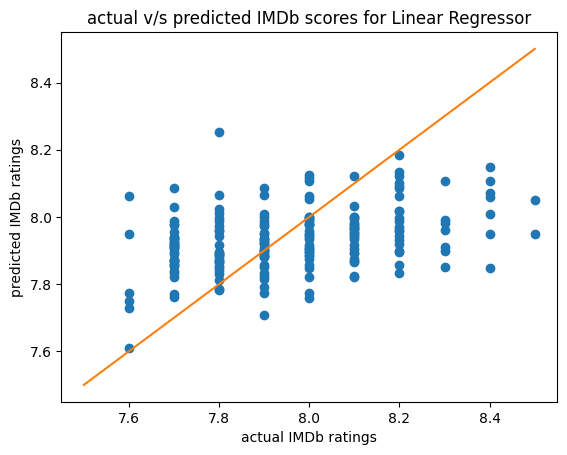

In [43]:
plt.plot(y_test,y_pred_reg,'o')
plt.plot(np.arange(7.5,8.6),np.arange(7.5,8.6))
plt.xlabel('actual IMDb ratings')
plt.ylabel('predicted IMDb ratings')
plt.title('actual v/s predicted IMDb scores for Linear Regressor')
plt.show()

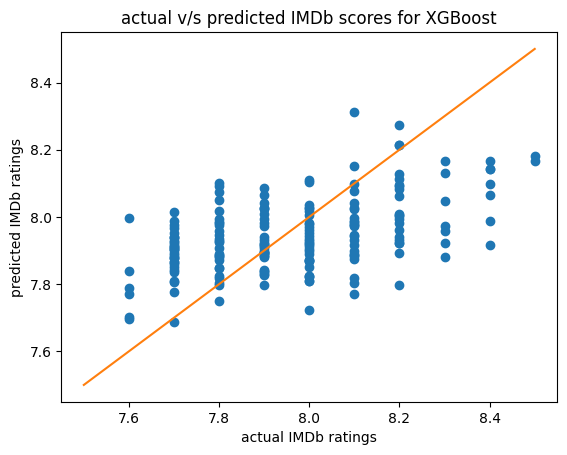

In [44]:
plt.plot(y_test,y_pred,'o')
plt.plot(np.arange(7.5,8.6),np.arange(7.5,8.6))
plt.xlabel('actual IMDb ratings')
plt.ylabel('predicted IMDb ratings')
plt.title('actual v/s predicted IMDb scores for XGBoost')
plt.show()

As it is evident, XGBoost actually learned better, how the IMDb ratings were varying with different features as opposed to Linear Regression which seems to be quite unaffected by relationships.

In [45]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_percentage_error
rmse = root_mean_squared_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
rmse,mape


(0.18052859948546326, 0.018712223342183237)

The RMSE score is telling us on average (RMS) the predicted IMDb scores are only off by 0.18.

The MAPE score tells us that our predictions only have an average error of 1.87% which is very minimal.

One of the reaons for such minimal error is the small range of values that the IMDb scores are usually taking(7.4-8.6). Nevertheless, an R-squared score of 25% for something as subjective as *IMDb ratings* is appreciable.

> A good R-squared score for a predictive model in context of social and behavioral sciences lies between 10% to 30%.

In [46]:
columns = X_train.columns
xgb_imp = xgb.feature_importances_
xgb_df = pd.DataFrame({'Features':columns, 'Importance':xgb_imp})
xgb_df.sort_values('Importance',ascending=False,inplace=True)
xgb_df

,Features,Importance
4,foo_Writers,0.366846
2,Director,0.174769
3,foo_Tags,0.169687
0,Votes,0.152712
1,Meta Score,0.135986


Text(0.5, 0, 'Features')

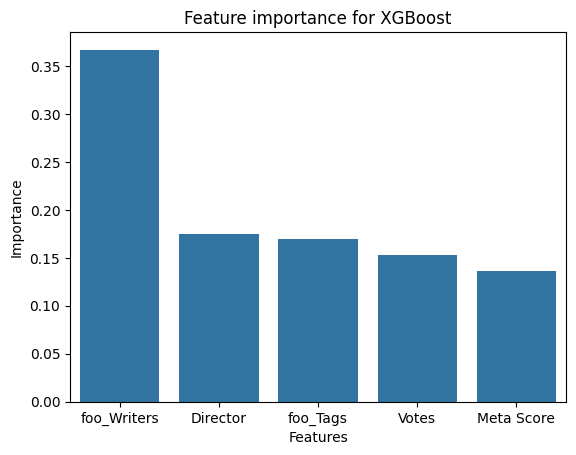

In [47]:
sns.barplot(x='Features',y='Importance',data=xgb_df)
plt.title('Feature importance for XGBoost')
plt.xlabel('Features')

From what is evident from this plot, we can say that xgboost percieves foo_Writers as the most important feature for predicting the IMDb scores. All other features have similar importance.

In [48]:
def predict_rating(model, sample):
    counter = 0
    for i in ['Tags','Stars','Writers']:
        sample_feature = sample.explode(i)
        sample_feature[f"foo_{i}"] = l[counter].transform(sample_feature[i])
        sample_grouped = sample_feature.groupby('Title')[f"foo_{i}"].mean().reset_index()
        sample = pd.merge(sample, sample_grouped, on='Title')
        sample.drop(columns=[i], inplace=True)
        counter += 1

    sample['Director'] = encoder.transform(sample['Director'])
    sample = sample[['Votes','Meta Score', 'Director','foo_Tags','foo_Writers']]
    return model.predict(sample)


In [49]:
cols = ['Title','Votes','Meta Score','Tags', 'Director','Writers','Stars']
sample_ = df_cleaned.sample(1)
sample = sample_[cols]
sample_y = sample_['IMDb Rating']

predict_rating(xgb, sample),sample_y

(array([8.071338], dtype=float32),
 901    8.3
 Name: IMDb Rating, dtype: float64)

## Conclusion

With this we have created a model that is decently capable of predicting IMDb score of a movie based on different features.

Further ahead, we will create a production ready model for our project in *pipeline.ipynb*